In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')
plt.rcParams.update({'font.size':16})

In [2]:
cars_df = pd.read_csv('data/cars.csv')

In [3]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [5]:
cars_df.describe()

,mpg,cylinders,displacement,weight,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


There are 398 vehicles listed, and there are no null values - but there is data missing
all vehicles are from 1970-1982 and from either 1-US, 2-Germany, 3-Japan

In [6]:
#sns.pairplot(cars_df)

<AxesSubplot:xlabel='origin', ylabel='Count'>

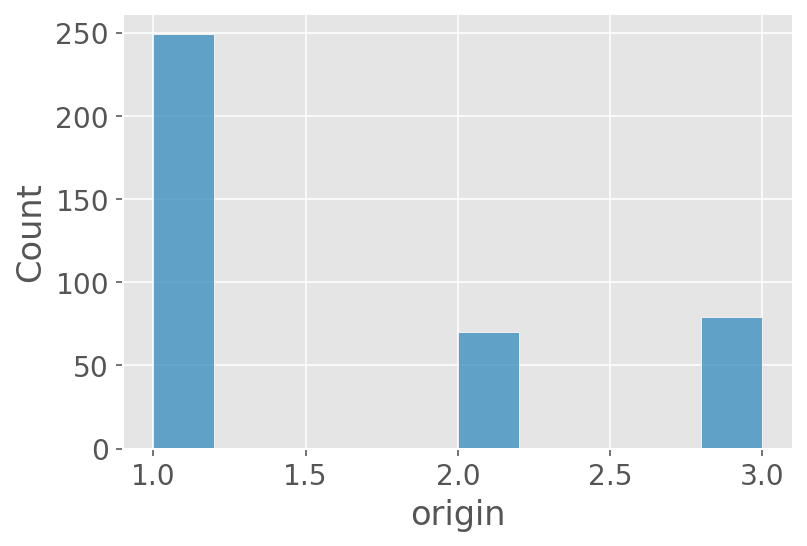

In [7]:
sns.histplot(cars_df.origin)

In [8]:
cars_df.groupby('origin').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,car_name
origin,,,,,,,,
1,249,249,249,249,249,249,249,249
2,70,70,70,70,70,70,70,70
3,79,79,79,79,79,79,79,79


In [9]:
'2'.isnumeric()

True

In [10]:
cars_df.groupby('horsepower').count()

,mpg,cylinders,displacement,weight,acceleration,model,origin,car_name
horsepower,,,,,,,,
100.0,17,17,17,17,17,17,17,17
102.0,1,1,1,1,1,1,1,1
103.0,1,1,1,1,1,1,1,1
105.0,12,12,12,12,12,12,12,12
107.0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...
95.00,14,14,14,14,14,14,14,14
96.00,3,3,3,3,3,3,3,3
97.00,9,9,9,9,9,9,9,9


In [11]:
cars_df.loc[cars_df['horsepower']=='?','horsepower'] = np.nan

In [12]:
cars_df.loc[cars_df['horsepower']==np.nan]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name


In [13]:
cars_df.iloc[35]

mpg                                  17.0
cylinders                               6
displacement                        250.0
horsepower                          100.0
weight                             3329.0
acceleration                         15.5
model                                  71
origin                                  1
car_name        chevrolet chevelle malibu
Name: 35, dtype: object

In [14]:
cars_df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', nan, '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [15]:
cars_df.horsepower.hasnans

True

In [16]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [17]:
cars_df.horsepower = cars_df.horsepower.astype(float)

In [18]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model         398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [19]:
len(cars_df.car_name.unique())

305

In [20]:
cars_df[['car_makes','model']] = cars_df['car_name'].str.split(' ',n=1,expand=True)

In [21]:
cars_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,car_makes
0,18.0,8,307.0,130.0,3504.0,12.0,chevelle malibu,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,skylark 320,1,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436.0,11.0,satellite,1,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,rebel sst,1,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449.0,10.5,torino,1,ford torino,ford


In [22]:
cars_df.groupby('car_makes')[['car_makes','horsepower']].mean()

,horsepower
car_makes,
amc,114.703704
audi,86.714286
bmw,111.500000
buick,136.411765
cadillac,152.500000
capri,92.000000
chevroelt,105.000000
chevrolet,112.930233
chevy,142.333333


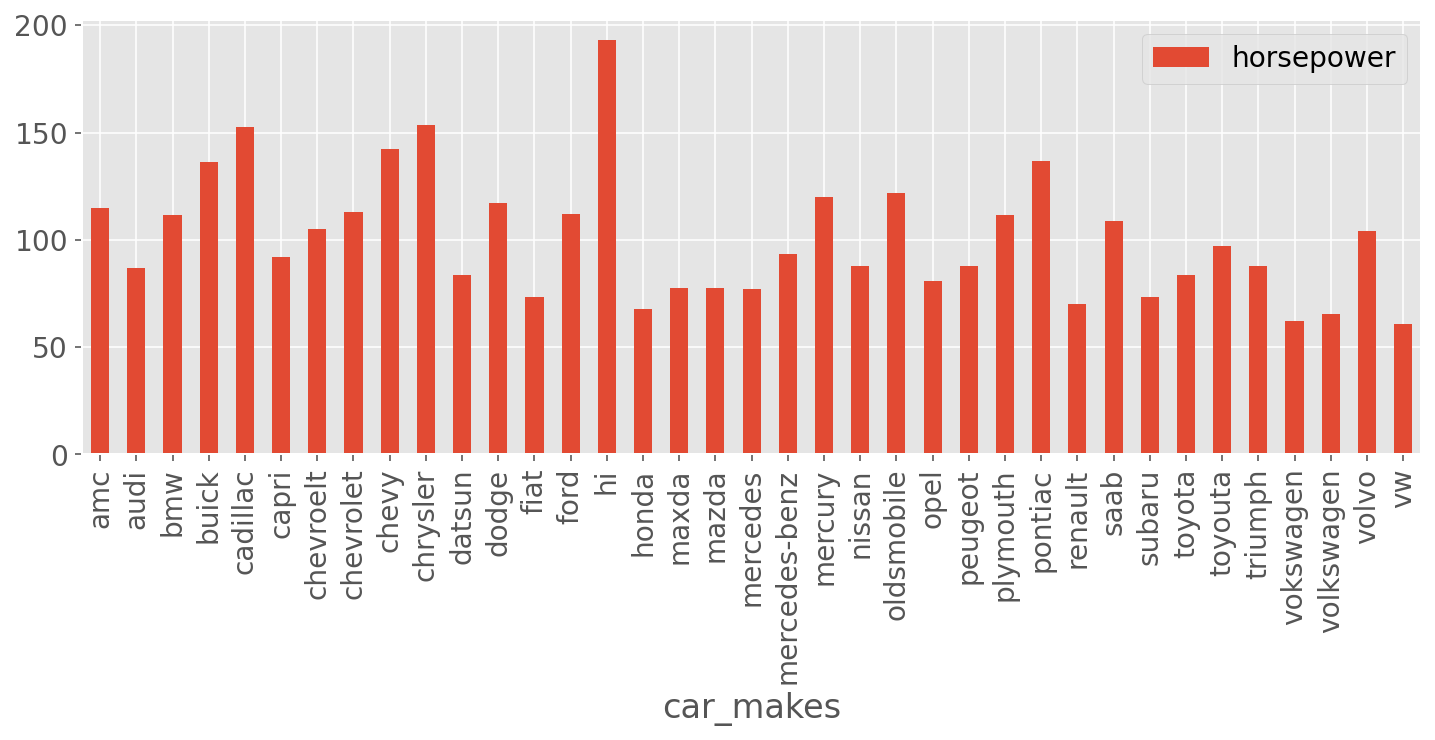

In [23]:
cars_df.groupby('car_makes')[['car_makes','horsepower']].mean().plot.bar(figsize=(12,4));

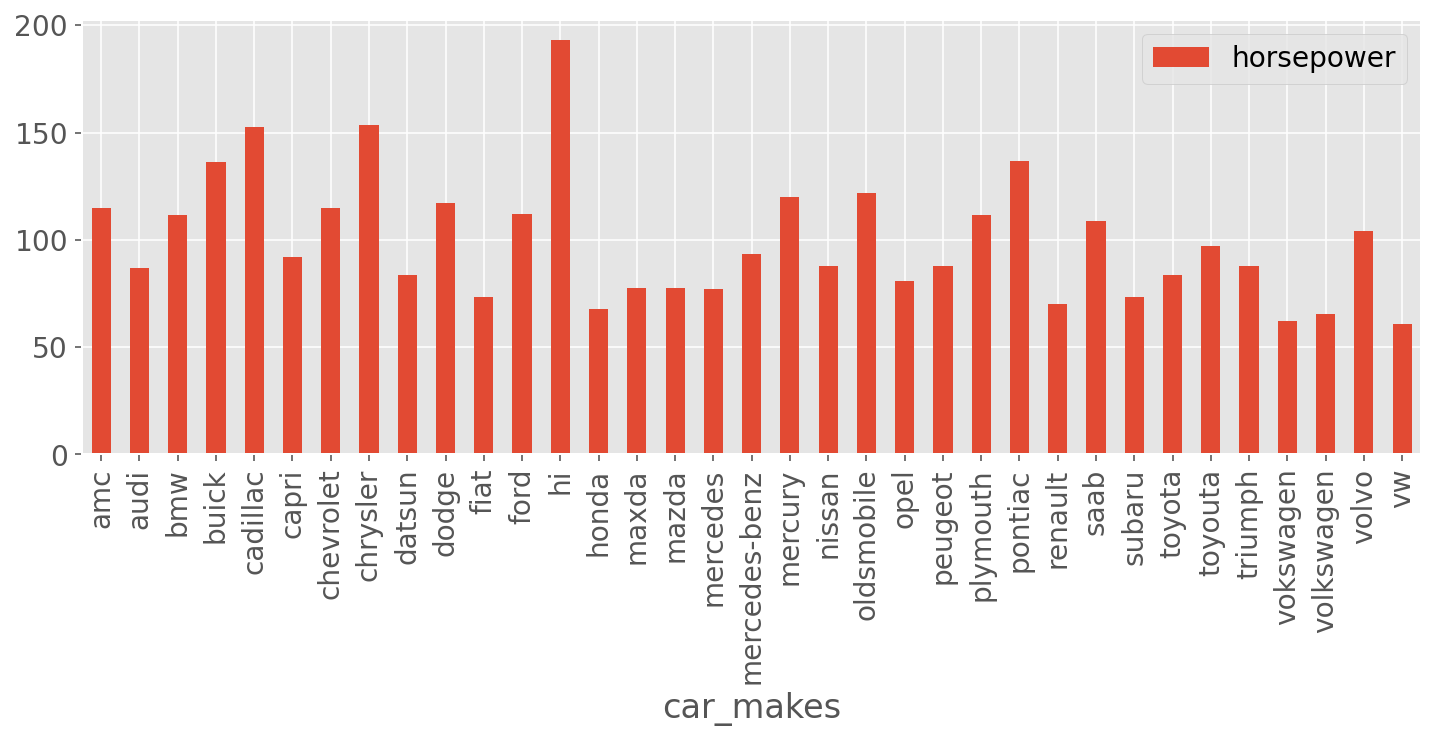

In [24]:
cars_df.loc[(cars_df['car_makes'] == 'chevroelt')| (cars_df['car_makes']== 'chevy'), 'car_makes'] = 'chevrolet'
cars_df.groupby('car_makes')[['car_makes','horsepower']].mean().plot.bar(figsize=(12,4));

car_makes
chevrolet    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
ford         [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

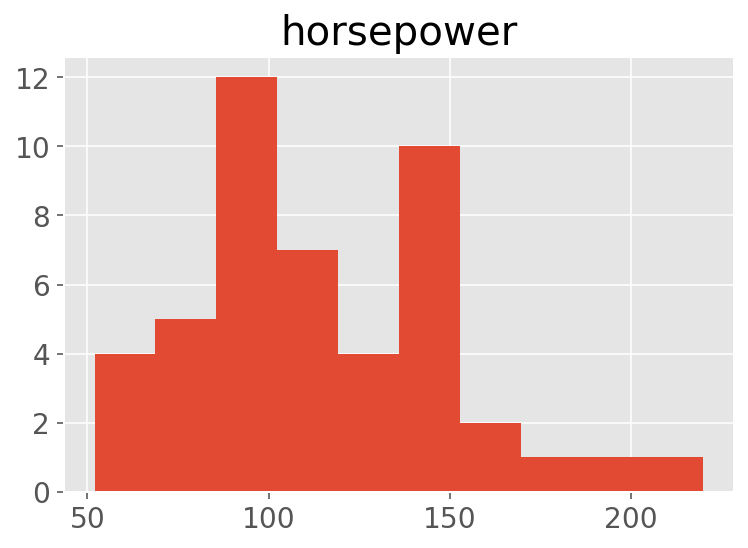

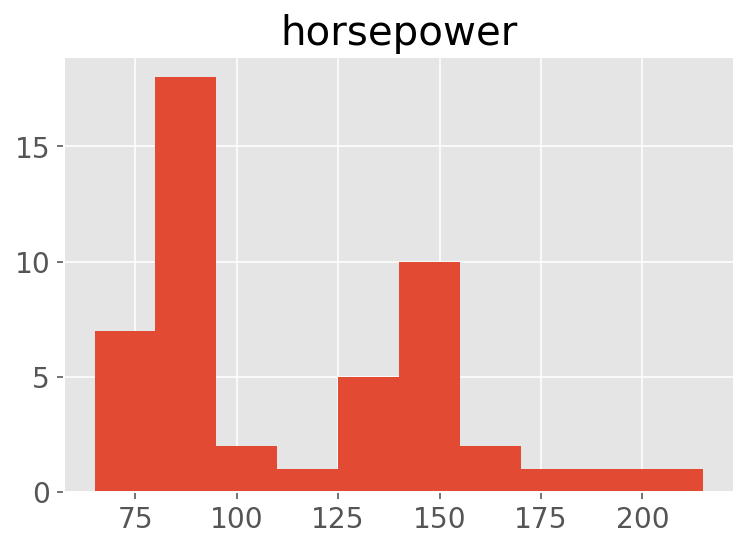

In [25]:
cars_df[(cars_df['car_makes']=='ford')|(cars_df['car_makes']=='chevrolet')].groupby('car_makes').hist('horsepower')

In [ ]:
fig,ax = plt.subplots(figsize=(8,5))
counts,bins,_ = ax.hist([cars_df[cars_df['car_makes']=='ford'].horsepower,cars_df[cars_df['car_makes']=='chevrolet'].horsepower],label=['Ford','Chevy'],bins=range(50,225,20))
ax.legend()
ax.set_xlabel('Horsepower Ranges')
ax.set_ylabel('Vehicle Count')
ax.set_title('Distribution of Vehicle Horsepower')
ax.set_xticks(bins)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.savefig('images/hist_of_horsepower.png',dpi=300)

In [26]:
chevy_hp = np.array(cars_df[(cars_df['car_makes']=='chevrolet')].horsepower)
ford_hp = np.array(cars_df[(cars_df['car_makes']=='ford')].horsepower)

In [27]:
print(len(chevy_hp))
print(len(ford_hp))

47
51


In [28]:
def bootstrap_sample_means(data, n_bootstrap_samples=10000):
    bootstrap_sample_means = []
    for i in range(n_bootstrap_samples):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_sample_means.append(np.nanmean(bootstrap_sample))
    return bootstrap_sample_means

In [29]:
chevy_means = bootstrap_sample_means(chevy_hp)
ford_means = bootstrap_sample_means(ford_hp)

In [30]:
chevy_dist = stats.norm(loc=np.mean(chevy_means),scale=np.std(chevy_means))
ford_dist = stats.norm(loc=np.mean(ford_means),scale=np.std(ford_means))

In [31]:
def plot_dist(ax,dist,label):
    x = np.linspace(50,250,500)
    ax.plot(x,dist.pdf(x),label=label)

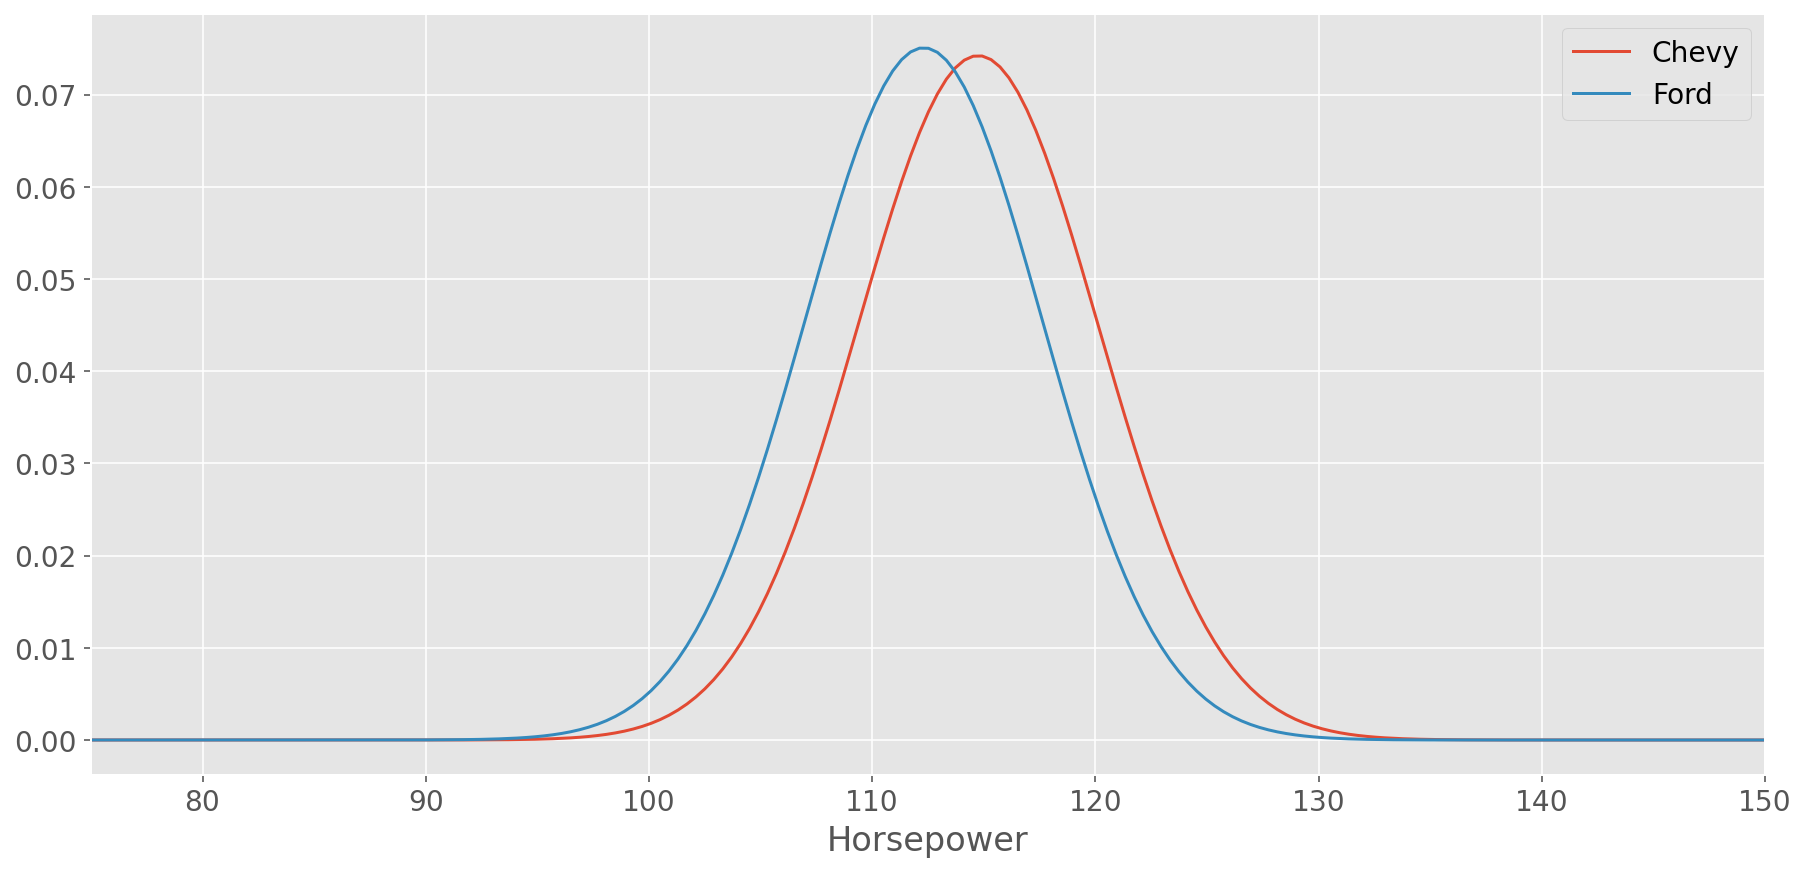

In [32]:
fig,ax = plt.subplots(figsize=(15,7))

plot_dist(ax,chevy_dist,label='Chevy')
plot_dist(ax,ford_dist,label='Ford')

ax.set_xlim(75,150)
ax.legend()
ax.set_xlabel('Horsepower')
plt.show()

In [33]:
print(np.percentile(chevy_means,2.5))
print(np.percentile(chevy_means,97.5))
print(np.percentile(ford_means,2.5))
print(np.percentile(ford_means,97.5))

104.31914893617021
125.27659574468085
102.31914893617021
123.08515263644773


In [34]:
print(chevy_dist.ppf(.025))
print(chevy_dist.ppf(.975))
print(ford_dist.ppf(.025))
print(ford_dist.ppf(.975))

104.21451376246416
125.28517559923797
101.8964208028742
122.72682087517072
